## Método de propagación de la afinidad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle

In [2]:
centers =[ [1,1], [-1,-1], [1, -1] ]
X, labels = make_blobs(n_samples=300, centers= centers, cluster_std=0.5, random_state=0)

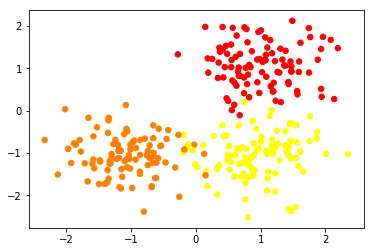

In [3]:
plt.scatter(X[:, 0], X[:,1], c=labels, cmap='autumn', s=30)

In [9]:
def report_affinity_propagation(X):
    import matplotlib.pyplot as plt
    af = AffinityPropagation( preference=-50 ).fit(X)
    cluster_centers_id = af.cluster_centers_indices_
    labels_cluster = af.labels_
    n_clust = len(cluster_centers_id)
    print('Numero estimado de clusters: %d'%n_clust)
    print( 'Homogeneidad %0.3f'%metrics.homogeneity_score(labels, labels_cluster) )
    print( 'Completitud %0.3f'%metrics.completeness_score(labels, labels_cluster) )
    print( 'V-measure %0.3f'%metrics.v_measure_score(labels, labels_cluster) )
    print( 'R ajustado %0.3f'%metrics.adjusted_rand_score(labels, labels_cluster) )
    print( 'Informacion mutua adustada %0.3f'
          %metrics.adjusted_mutual_info_score(labels, labels_cluster) )
    print( 'Coeficiente de la silueta %0.3f'
          %metrics.silhouette_score(X, labels, metric= 'sqeuclidean'))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (labels_cluster == k)
        cluster_centers = X[cluster_centers_id[k]]
        plt.plot( X[class_members,0] , X[class_members, 1], col+'.')
        plt.plot(cluster_centers[0], cluster_centers[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        
        for x in X[class_members]:
            aux_x = [ cluster_centers[0], x[0] ]
            aux_y = [ cluster_centers[1], x[1] ]
            plt.plot(aux_x, aux_y, col)

            
    plt.title('Numero estimado de cluster %d'%n_clust)
    plt.show()
    plt.savefig('metodo-afinidad')

Numero estimado de clusters: 3
Homogeneidad 0.872
Completitud 0.872
V-measure 0.872
R ajustado 0.912
Informacion mutua adustada 0.871
Coeficiente de la silueta 0.735


/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


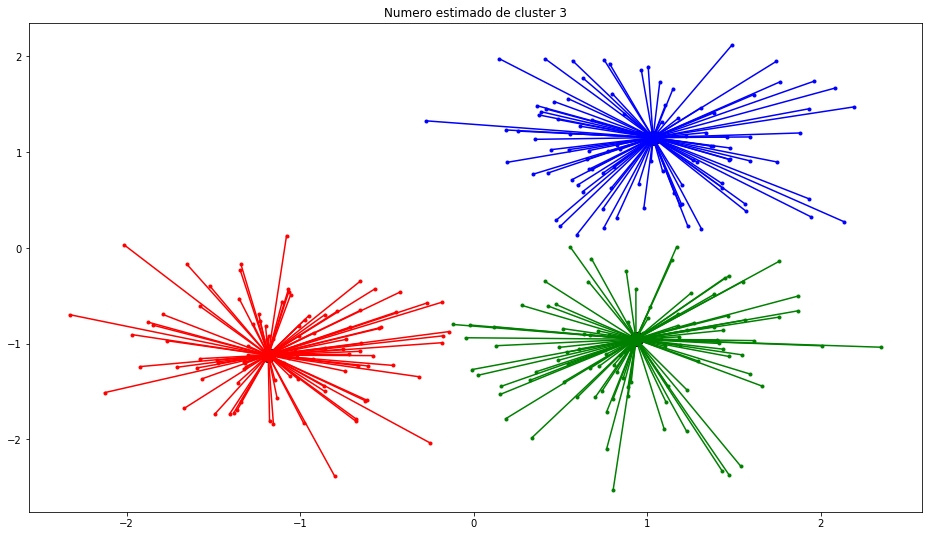

<Figure size 432x288 with 0 Axes>

In [10]:
report_affinity_propagation(X)

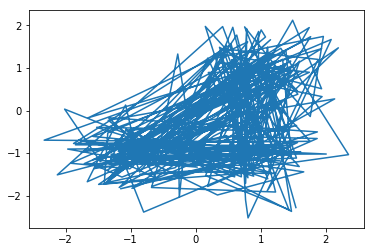